## **Configuraciones previas e Instalación de librerías y paquetes**

En primer lugar se requiere realizar diversos ajustes al entorno de ejecución, dichos ajustes pueden observarse a continuación:


In [1]:
!pip install -q kaggle


In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d patrickgendotti/steam-achievementstatscom-rankings
! unzip /content/steam-achievementstatscom-rankings.zip

 70% 25.0M/35.5M [00:00<00:00, 72.5MB/s]
100% 35.5M/35.5M [00:00<00:00, 77.1MB/s]
Archive:  /content/steam-achievementstatscom-rankings.zip
  inflating: amended_first_200k_players.csv  
  inflating: country_data.csv        


Tras haber realizado los ajustes mencionados, se requiere instalar distintas librerías y paquetes de Python para poder llevar a cabo la resolución de los problemas planteados en el enunciado, dichas librerías y paquetes son instalados a continuación:

In [1]:
!pip install -U matplotlib
import matplotlib as plt
import pandas as pd
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install -U pandasql 
from pandasql import sqldf
from sklearn import datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install -U scikit-learn
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Lectura de datos**
Para esta sección del desarrollo de la tarea se usa la librería *pandas* y su función *read_csv()* para obtener los datos del dataset y guardarlos en una variable, esta variable es de tipo dataframe lo cual nos otorga distintas facilidades al momento de trabajarla.

La función *describe()* nos entrega diversas estadisticas del dataframe deseado, mientras que la función *head()* nos muestra las primeras lineas del dataframe.

In [4]:
data = pd.read_csv("amended_first_200k_players.csv")
data.describe()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Rank,Points,#,Games,100%,All,Badges,XP,Hours
count,200010.000000,200010.000000,200010.000000,200010.000000,200010.000000,200010.000000,177328.000000,200010.000000,2.000100e+05,2.000100e+05
mean,99974.504500,100005.500000,1536.015505,2297.027194,538.229974,20.377451,742.743120,83.951577,3.268784e+04,5.562079e+03
std,57738.050216,57738.058008,1806.114955,2095.428099,904.404437,60.082002,1403.381723,261.649782,2.048665e+05,1.112689e+04
min,0.000000,1.000000,467.600000,241.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,49972.250000,50003.250000,693.492500,1216.000000,161.000000,2.000000,194.000000,16.000000,3.675250e+03,2.435500e+03
50%,99974.500000,100005.500000,1049.210000,1737.000000,285.000000,6.000000,365.000000,33.000000,9.963000e+03,4.232450e+03
75%,149976.750000,150007.750000,1728.950000,2675.000000,551.000000,19.000000,733.000000,69.000000,2.469975e+04,6.810925e+03
max,199979.000000,200010.000000,132759.300000,153732.000000,24848.000000,6034.000000,41003.000000,19496.000000,3.668572e+07,1.173505e+06


In [5]:
data.head()

,Unnamed: 0,Rank,Player Id,Player Name,Best achievements,Points,#,Games,100%,All,Badges,XP,Member since,Hours,Last update
0,0,1,The Stranger,The Stranger,Blessing of the Flame Requiescat Memory Awak...,132759.30,153732,16755,4493,21203.0,4910,3087192,04/15/2011,75591.8,05/26/2022 11:41:05
1,1,2,lylat,lylat,"Death from Above Apex Predator Waste Not, Wa...",119588.95,141645,18358,6034,28377.0,195,296822,06/03/2009,55960.7,05/26/2022 11:42:01
2,2,3,hannez,hannez,Legendary Heckler Legendary Storm Legendary ...,96014.25,98255,13651,4008,23981.0,2009,792032,06/23/2010,33020.0,05/26/2022 11:40:54
3,3,4,DDtective,DDtective,Escaping Outlands A Duneman's Promise Elite ...,89515.41,101757,12070,3708,19821.0,196,60662,09/01/2005,9352.9,07/22/2022 23:39:26
4,4,5,Skaery,Skaery,World of Easy Goo World of Okay Goo World of...,88175.83,95676,10338,2127,13092.0,645,198956,06/08/2004,89602.9,05/26/2022 11:38:46


## **Distribución de datos para Training y Testing**
Mediante el uso de la librería *pandasql* se crean dos consultas para poder separar el dataset en una proporción de 60% para training y 40% para testing. Posteriormente se definen los campos del dataset a tratar por los distintos algoritmos y se indican las dimensiones de cada sección del dataset.

In [6]:

q="SELECT *, Rank%5 as grup FROM data WHERE grup = 0 OR grup= 2 OR grup = 4  "
TrainingData = sqldf(q,globals())

q="SELECT *, Rank%5 as grup FROM data WHERE grup = 1 OR grup= 3  "
TestingData = sqldf(q,globals())

inputTrainingX = np.array(TrainingData[['Games','Badges','100%']])
inputTrainingY = np.array(TrainingData[['Points']])
inputTestingX = np.array(TestingData[['Games','Badges','100%']])
inputTestingY = np.array(TestingData[['Points']])

print(inputTrainingX.shape)
print(inputTrainingY.shape)
print(inputTestingX.shape)
print(inputTestingY.shape)

(120006, 3)
(120006, 1)
(80004, 3)
(80004, 1)


## **Visualización de datos**
A continuación se muestra un gráfico de los datos de entrenamiento en su estado natural, sin ser afectados por ninguno de los algoritmos a desarrollar. Además puede observarse la cantidad de usuarios y su respectiva cantidad de juegos, medallas, juegos completados al 100% y puntos de Steam gracias al uso de la función *groupby()*.

<function matplotlib.pyplot.show(close=None, block=None)>

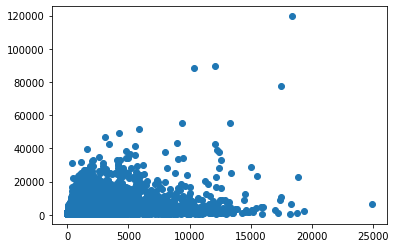

In [7]:
plt.scatter(inputTrainingX[:,0], inputTrainingY)
plt.show

In [59]:
print(TrainingData.groupby('Games').size())
print("--------------------------------------------")
print(TrainingData.groupby('Badges').size())
print("--------------------------------------------")
print(TrainingData.groupby('100%').size())
print("--------------------------------------------")
print(TrainingData.groupby('Points').size())

Games
1        1
2        2
3        2
4        6
5        5
        ..
18358    1
18791    1
18831    1
19335    1
24848    1
Length: 4786, dtype: int64
--------------------------------------------
Badges
0         118
1          23
2         189
3        1235
4        1999
         ... 
10415       1
10953       1
11153       1
14207       1
16222       1
Length: 1766, dtype: int64
--------------------------------------------
100%
0       13461
1       13267
2       10869
3        8433
4        6815
        ...  
3266        1
3449        1
3708        1
3938        1
6034        1
Length: 680, dtype: int64
--------------------------------------------
Points
467.60       2
467.61       2
467.62       3
467.64       1
467.65       3
            ..
55462.62     1
77283.09     1
88175.83     1
89515.41     1
119588.95    1
Length: 94167, dtype: int64


## **Algoritmo KNN**
Este algoritmo predice el valor de los puntos de Steam de cada usuario según los valores de los usuarios que lo rodean. Se puede observar tambien el cálculo del error haciendo uso de 3 métricas distintas según lo solicitado en el enunciado. Dichas métricas otorgan mediciones del error muy distintas entre si, lo cual puede explicarse debido a las fórmulas matematicas de donde provienen. La métrica que otorga un mejor valor de error en relación a los datos de la predicción resulta ser el error absoluto medio.

Finalmente se puede observar una comparación entre 2 gráficos que representan los datos de testing y la predicción realizada respectivamente, resulta evidente la diferencia entre los valores obtenidos en ambos casos sin embargo cabe destacar la buena aproximación lograda por la predicción.

In [9]:
neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(inputTrainingX, inputTrainingY)
print(neigh.predict(inputTestingX))
res = neigh.predict(inputTestingX)

print("error cuadrático medio: ", mean_squared_error(inputTestingY, res))
print("error absoluto medio: ", mean_absolute_error(inputTestingY, res))
print("error máximo residual: ", max_error(inputTestingY, res))

[[35381.945]
 [35042.28 ]
 [46859.072]
 ...
 [  695.964]
 [  682.388]
 [  670.811]]
error cuadrático medio:  1195263.4292286963
error absoluto medio:  520.1788947052647
error máximo residual:  97377.355


<function matplotlib.pyplot.show(close=None, block=None)>

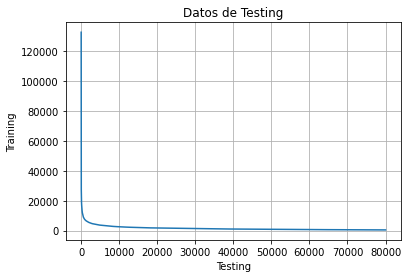

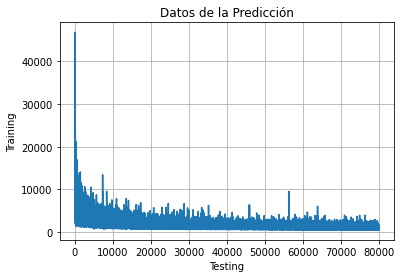

In [10]:
plt.figure(0)
plt.plot(inputTestingY)
plt.grid()
plt.title('Datos de Testing')
plt.xlabel('Testing')
plt.ylabel('Training')
plt.figure(1)
plt.plot(res)
plt.grid()
plt.title('Datos de la Predicción')
plt.xlabel('Testing')
plt.ylabel('Training')
plt.show

## **Algoritmo Regresión Lineal**
Este algoritmo predice el valor de los puntos de Steam de cada usuario según la cercanía que tenga dicho usuario a una recta de ajuste lineal. En el caso del dataset utilizado y los campos elegidos dicha recta es generada mayormente por el campo "100%" (el cual puede ser observado en el tercer gráfico de puntos) sin embargo la densidad de puntos en los otros dos campos genera una perdida de precisión que dificulta llevar a cabo una buena predicción, esto puede verse reflejado en el alto valor del error si se le compara con los datos obtenidos de la predicción. Se puede notar además como el valor obtenido mediante el uso del error cuadrático medio se acerca al obtenido para el caso de KNN bajo la misma métrica, lo cual se explica en que se está trabajando con los mismos datos en ambos casos.

In [38]:
reg = LinearRegression().fit(inputTrainingX, inputTrainingY)
print(reg.predict(inputTestingX))
res2 = reg.predict(inputTestingX)

print("error cuadrático medio: ", mean_squared_error(inputTestingY, res2))

[[107988.73641686]
 [ 96431.07351947]
 [ 94595.96551919]
 ...
 [  1033.02637433]
 [   967.19922372]
 [   972.44118348]]
error cuadrático medio:  944119.624355513


<function matplotlib.pyplot.show(close=None, block=None)>

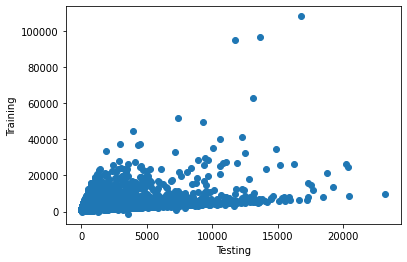

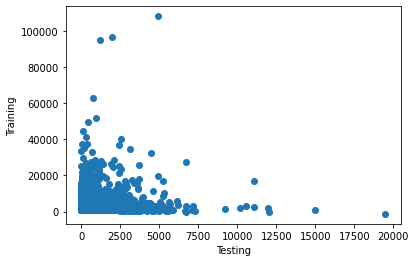

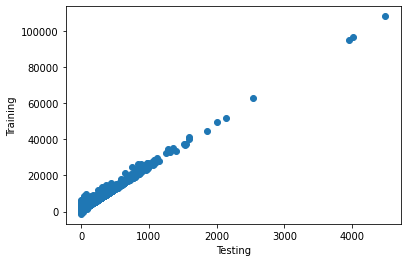

In [39]:
plt.figure(0)
plt.scatter(inputTestingX[:,0],res2)
plt.xlabel('Testing')
plt.ylabel('Training')
plt.figure(1)
plt.scatter(inputTestingX[:,1],res2)
plt.xlabel('Testing')
plt.ylabel('Training')
plt.figure(2)
plt.scatter(inputTestingX[:,2],res2)
plt.xlabel('Testing')
plt.ylabel('Training')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

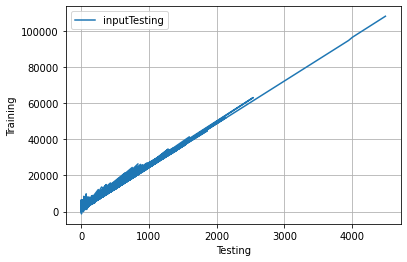

In [40]:
plt.plot(inputTestingX[:,2],res2)
plt.xlabel('Testing')
plt.ylabel('Training')
plt.legend(['inputTesting','resultados'])
plt.grid()
plt.show

## **Algoritmo GMM**
En este algoritmo se espera clasificar los datos entregados como parámetros de aprendizaje (Games, Badges y 100%) e identificar cual es el que aporta más a la predicción del parámetro Points. Como se puede observar en los distintos gráficos generados es claro que el parámetro de etiqueta con valor 2 es quien más aporta de cara a la predicción, dicho parámetro corresponde a la cantidad de juegos que el usuario haya completado al 100%. Esta interpretación de los datos obtenidos se sustenta en como se definieron anteriormente las variables *inputTrainingX* y *inputTestingX* en la sección de distribución de datos.

In [63]:
gm = GaussianMixture(n_components=3, covariance_type="full", init_params="kmeans").fit(inputTrainingX, inputTrainingY)
gm.means_
res3 = gm.predict(inputTestingX)
print(res3)

[1 1 1 ... 0 0 2]


<function matplotlib.pyplot.show(close=None, block=None)>

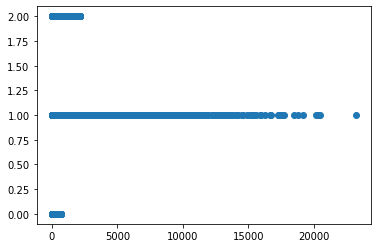

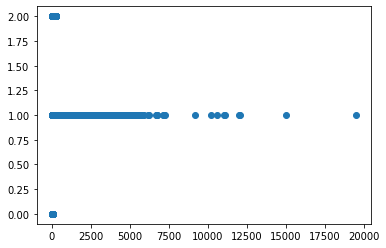

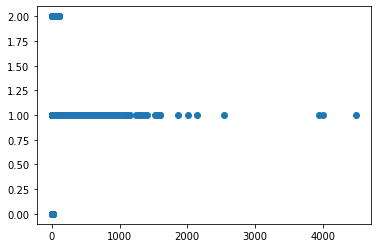

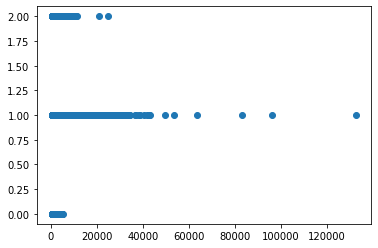

In [64]:
plt.figure(0)
plt.scatter(inputTestingX[:,0], res3)
plt.figure(1)
plt.scatter(inputTestingX[:,1], res3)
plt.figure(2)
plt.scatter(inputTestingX[:,2], res3)
plt.figure(3)
plt.scatter(inputTestingY, res3)
plt.show

## **Algoritmo DBSCAN**
De manera similar al caso anterior, en este algoritmo se espera clasificar los datos entregados como parámetros de aprendizaje (Games, Badges y 100%) e identificar cual es el que aporta más a la predicción del parámetro Points. Como se puede observar en los distintos gráficos generados es claro que el parámetro de etiqueta con valor -1 es quien más aporta de cara a la predicción, sin embargo resulta dificil asociar dicho parámetro a uno de los campos antes mencionados. Se presume que corresponda al campo "100%" ya que la lógica de funcionamiento de ambos algoritmos es similar, por lo que deberian entregar resultados similares hasta cierto punto, guardando las proporciones generadas por los detalles de funcionamiento en cada caso.

In [65]:
dbs = DBSCAN(eps=25, min_samples=25).fit(inputTrainingX, inputTrainingY)
res4 = dbs.fit_predict(inputTestingX, inputTestingY)
print(dbs.labels_)

[-1 -1 -1 ...  0  0  0]


<function matplotlib.pyplot.show(close=None, block=None)>

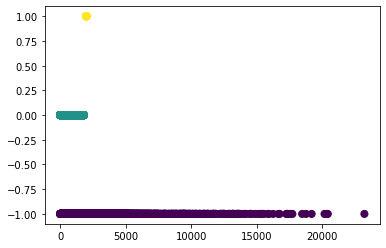

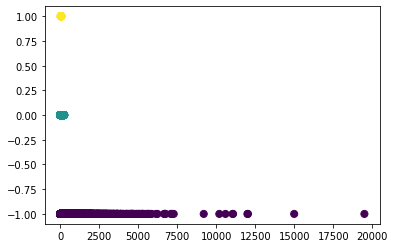

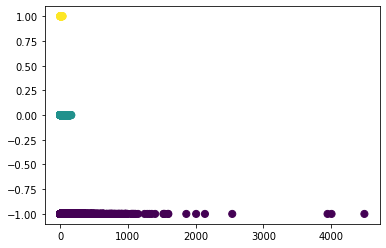

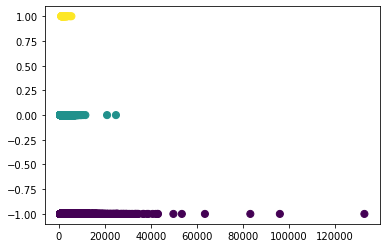

In [66]:
plt.figure(0)
plt.scatter(inputTestingX[:,0], res4, c = dbs.labels_.astype(float), s = 50)
plt.figure(1)
plt.scatter(inputTestingX[:,1], res4, c = dbs.labels_.astype(float), s = 50)
plt.figure(2)
plt.scatter(inputTestingX[:,2], res4, c = dbs.labels_.astype(float), s = 50)
plt.figure(3)
plt.scatter(inputTestingY, res4, c = dbs.labels_.astype(float), s = 50)
plt.show

## **Comparación entre GMM y DBSCAN**
Cabe destacar que ambos algoritmos predicen 3 valores distintos para las etiquetas, lo cual se asocia directamente con la naturaleza del problema planteado. 

Una diferencia importante a notar es el hecho de que DBSCAN puede utilizar valores negativos para indicar las etiquetas obtenidas mientras que GMM solo utiliza valores mayores o iguales a cero. Otra diferecia destacable es el hecho de que GMM puede trabajar con una mezcla de distribuciones de datos (tanto visibles como ocultos) gracias al uso del algoritmo EM, mientras que DBSCAN solo trabaja sobre una distribución de datos los cuales deben ser explicitos para poder ser utilizados.